In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [39]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

In [2]:
import pickle

In [3]:
data = pickle.load(open('predictions/sparse-static-transfer.pkl','r'))

In [143]:
err = {}
params = {}
for static_fac in ['None','static']:
    err[static_fac] = {}
    params[static_fac] = {}
    for num_home_factors in range(3, 9):
        err[static_fac][num_home_factors] = {}
        params[static_fac][num_home_factors] = {}
        for num_season_factors in range(1, 9):
            best_lam = 1
            best_error = 1e5
            for lam in [0.001, 0.01, 0.1, 1.]:
                for fraction in range(10, 110, 10):
                    d[fraction] = pd.DataFrame(data[static_fac][lam][num_home_factors][num_season_factors][fraction]).mean(axis=1)[APPLIANCES_ORDER[1:]]
                mean_df = pd.DataFrame(d).mean().mean()
                if mean_df<best_error:
                    best_error = mean_df
                    best_lam = lam
            err[static_fac][num_home_factors][num_season_factors] = best_error
            params[static_fac][num_home_factors][num_season_factors] = best_lam




In [134]:
pd.DataFrame(params)

,3,4,5,6,7,8
1,1.00,0.10,0.100,0.10,0.010,0.001
2,0.10,0.01,1.000,1.00,0.001,0.100
3,0.10,0.10,1.000,0.10,0.100,0.100
4,0.10,0.01,0.010,0.10,0.100,0.010
5,0.10,1.00,0.100,1.00,0.001,1.000
6,0.01,1.00,1.000,1.00,1.000,1.000
7,0.10,0.10,0.001,0.01,1.000,1.000
8,0.10,1.00,1.000,1.00,0.100,1.000


In [135]:
import seaborn as sns

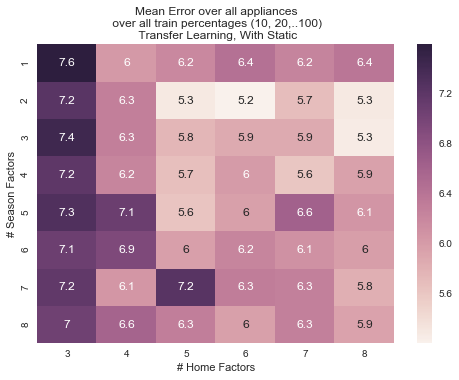

In [145]:
sns.heatmap(pd.DataFrame(err['static']), annot=True)
plt.xlabel("# Home Factors")
plt.ylabel("# Season Factors")
plt.title("Mean Error over all appliances\n over all train percentages (10, 20,..100)\n Transfer Learning, With Static")

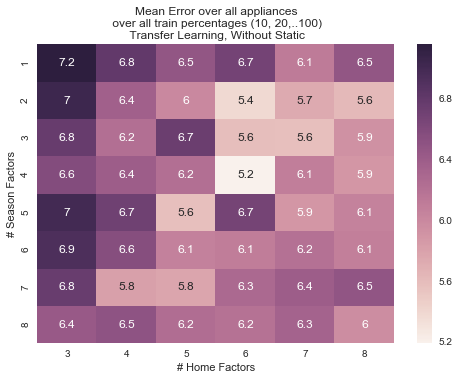

In [146]:
sns.heatmap(pd.DataFrame(err['None']), annot=True)
plt.xlabel("# Home Factors")
plt.ylabel("# Season Factors")
plt.title("Mean Error over all appliances\n over all train percentages (10, 20,..100)\n Transfer Learning, Without Static")

In [147]:
normal_data = pickle.load(open('predictions/normal-sparse-static-normalised.pkl','r'))

In [149]:
normal_static_df = pd.Panel(normal_data['static'][0.01][2]).mean(axis=0)
normal_static_df

,dw,fridge,hvac,mw,oven,wm
10,2.398705,8.627762,22.420433,2.111052,2.293516,1.141393
50,2.016917,9.811161,20.478524,1.873081,2.477936,0.852367
90,1.984527,7.475613,18.514502,1.784499,2.103115,0.738651


In [47]:
best_params = {
    'Normal':{'Without':0.1, 'With':0.01},
    'Transfer':{'Without':0.1, 'With':0.001},
    'Joint':{'Without':0,'With':0.001}
}

hvac      17.233784
fridge    12.359428
mw         2.884071
dw         2.436075
wm         1.004331
oven       3.377141
dtype: float64

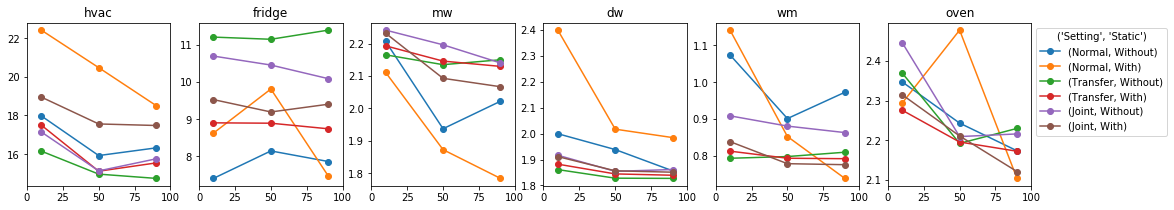

In [38]:
fig, ax = plt.subplots(figsize=(18, 3), ncols=6)
for setting in ['Normal','Transfer','Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
            df[appliance].plot(ax=ax[i], title=appliance, label=(setting, static), marker='o')
            ax[i].set_xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))

In [150]:
fridge_err = {}
fridge_params = {}
for static_fac in ['None','static']:
    fridge_err[static_fac] = {}
    fridge_params[static_fac] = {}
    for num_home_factors in range(3, 9):
        fridge_err[static_fac][num_home_factors] = {}
        fridge_params[static_fac][num_home_factors] = {}
        for num_season_factors in range(1, 9):
            best_lam = 1
            best_error = 1e5
            for lam in [0.001, 0.01, 0.1, 1.]:
                for fraction in range(10, 110, 10):
                    d[fraction] = pd.DataFrame(data[static_fac][lam][num_home_factors][num_season_factors][fraction]).mean(axis=1)[['fridge']]
                mean_df = pd.DataFrame(d).mean().mean()
                if mean_df<best_error:
                    best_error = mean_df
                    best_lam = lam
            fridge_err[static_fac][num_home_factors][num_season_factors] = best_error
            fridge_params[static_fac][num_home_factors][num_season_factors] = best_lam




In [170]:
pd.DataFrame(fridge_err['static'])

,3,4,5,6,7,8
1,9.775994,9.468676,9.506047,11.656494,10.853009,11.431013
2,8.564664,8.599074,8.795773,8.543933,10.341653,9.871544
3,8.715463,9.333528,7.559272,7.868842,8.890376,8.450331
4,8.215927,9.683830,10.905986,9.537797,8.201467,9.069231
5,8.472796,8.234634,10.187497,8.790569,9.573343,9.722334
6,7.497558,8.924801,9.500905,9.088770,8.973424,9.063934
7,8.242738,9.403047,9.062003,9.176050,9.167601,10.043287
8,7.558583,8.637446,9.526402,9.665346,10.213449,10.442442


In [152]:
pd.DataFrame(fridge_err['None'])

,3,4,5,6,7,8
1,10.829834,11.475334,11.510550,11.053806,10.844103,10.813670
2,9.780351,10.051058,8.804019,10.051326,9.678242,10.570174
3,9.971599,8.992031,12.044622,8.835277,9.808787,9.763134
4,8.918693,9.292821,10.850375,8.447782,10.695115,10.542172
5,9.448914,8.703114,9.550339,10.367785,8.598735,10.978947
6,8.735376,8.933403,9.227899,9.340515,11.150074,10.587286
7,8.490437,8.910200,8.775916,11.098541,9.866440,9.433324
8,7.098973,8.498752,9.303067,9.018540,9.820627,9.147005


In [171]:
pd.DataFrame(fridge_params['static'])

,3,4,5,6,7,8
1,0.001,0.001,0.001,0.001,1.000,0.100
2,0.001,0.001,0.001,0.001,1.000,0.001
3,0.001,0.010,0.001,0.001,0.001,0.001
4,0.001,1.000,0.100,0.001,0.001,1.000
5,0.001,0.001,0.010,0.001,1.000,1.000
6,0.001,0.001,0.100,0.001,0.001,0.100
7,0.001,0.100,1.000,0.001,0.001,0.001
8,0.001,0.001,0.010,0.010,0.001,0.010


In [232]:
from plot_functions import *

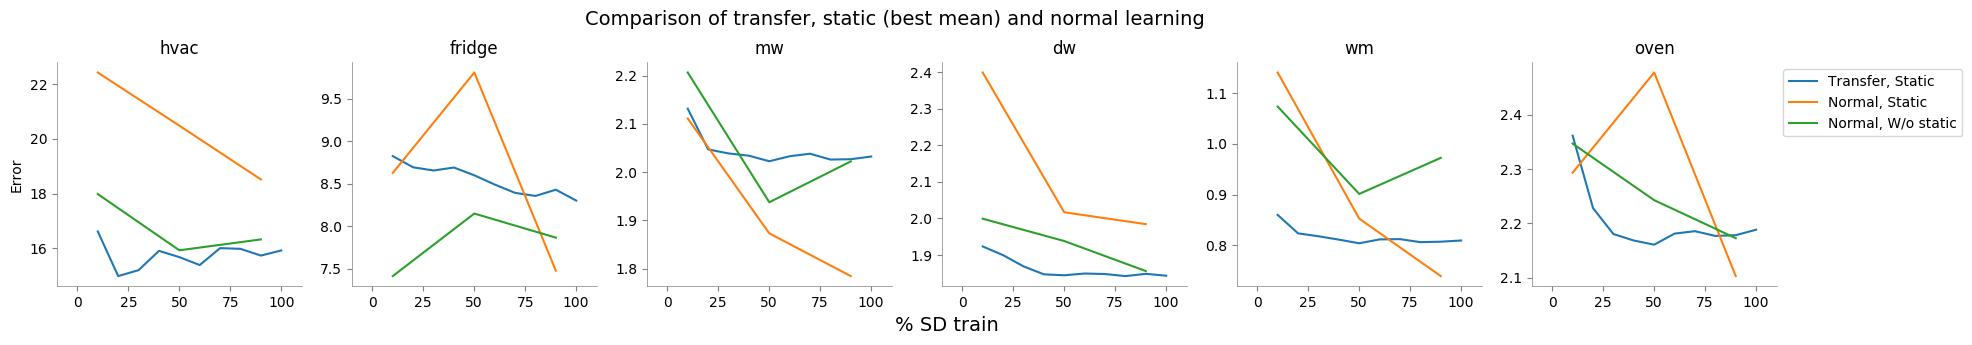

In [237]:
plt.style.use('default')
# Comparing best of 'Transfer+Static' with 'Normal+Static'
t = {}
for fraction in range(10, 110, 10):
    t[fraction] = pd.DataFrame(data['static'][0.001][6][2][fraction]).mean(axis=1)[APPLIANCES_ORDER[1:]]

normal_static_df = pd.Panel(normal_data['static'][0.01][2]).mean(axis=0)
normal_none_df = pd.Panel(normal_data[None][0.1][2]).mean(axis=0)


fig, ax = plt.subplots(ncols=6, figsize=(18, 3))
for col, appliance in enumerate(APPLIANCES_ORDER[1:]):
    pd.DataFrame(t).T[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Transfer, Static')
    normal_static_df[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Normal, Static')
    normal_none_df[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Normal, W/o static')
    ax[col].set_xlim((-10, 110))
    format_axes(ax[col])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle("Comparison of transfer, static (best mean) and normal learning", fontsize=14, y=1.05)
fig.text(0.5,-0.02, "% SD train", fontsize=14)
ax[0].set_ylabel("Error")
fig.tight_layout()

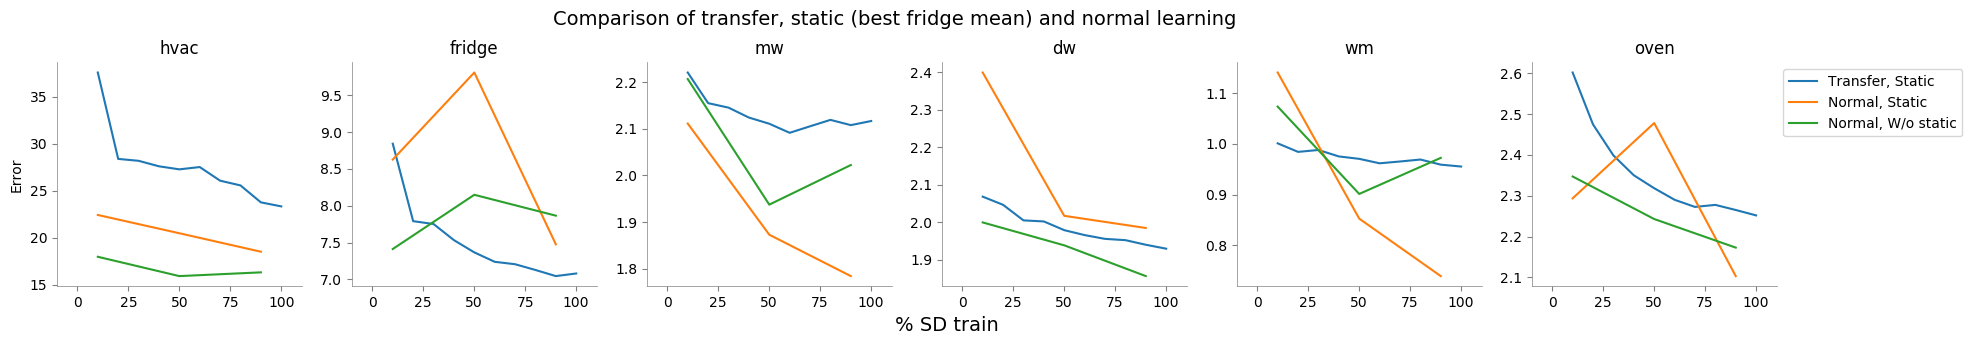

In [239]:
plt.style.use('default')
# Comparing best of 'Transfer+Static' with 'Normal+Static'
t = {}
for fraction in range(10, 110, 10):
    t[fraction] = pd.DataFrame(data['static'][0.001][3][6][fraction]).mean(axis=1)[APPLIANCES_ORDER[1:]]

normal_static_df = pd.Panel(normal_data['static'][0.01][2]).mean(axis=0)
normal_none_df = pd.Panel(normal_data[None][0.1][2]).mean(axis=0)


fig, ax = plt.subplots(ncols=6, figsize=(18, 3))
for col, appliance in enumerate(APPLIANCES_ORDER[1:]):
    pd.DataFrame(t).T[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Transfer, Static')
    normal_static_df[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Normal, Static')
    normal_none_df[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Normal, W/o static')
    ax[col].set_xlim((-10, 110))
    format_axes(ax[col])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle("Comparison of transfer, static (best fridge mean) and normal learning", fontsize=14, y=1.05)
fig.text(0.5,-0.02, "% SD train", fontsize=14)
ax[0].set_ylabel("Error")
fig.tight_layout()

In [241]:
mw_err = {}
mw_params = {}
for static_fac in ['None','static']:
    mw_err[static_fac] = {}
    mw_params[static_fac] = {}
    for num_home_factors in range(3, 9):
        mw_err[static_fac][num_home_factors] = {}
        mw_params[static_fac][num_home_factors] = {}
        for num_season_factors in range(1, 9):
            best_lam = 1
            best_error = 1e5
            for lam in [0.001, 0.01, 0.1, 1.]:
                for fraction in range(10, 110, 10):
                    d[fraction] = pd.DataFrame(data[static_fac][lam][num_home_factors][num_season_factors][fraction]).mean(axis=1)[['mw']]
                mean_df = pd.DataFrame(d).mean().mean()
                if mean_df<best_error:
                    best_error = mean_df
                    best_lam = lam
            mw_err[static_fac][num_home_factors][num_season_factors] = best_error
            mw_params[static_fac][num_home_factors][num_season_factors] = best_lam




In [246]:
pd.DataFrame(mw_err['static'])

,3,4,5,6,7,8
1,2.339251,2.417336,2.377416,2.354194,2.315456,2.299237
2,2.095721,2.043525,2.141935,2.042975,2.001115,2.133918
3,2.170537,2.066399,1.998529,2.075860,2.104964,1.957987
4,2.077039,2.173768,2.136480,2.093454,1.922888,2.074919
5,2.098523,2.087908,2.199329,2.117502,2.018519,2.147932
6,2.129433,2.096684,2.142814,2.049836,2.094089,1.964196
7,2.197868,2.192216,2.163237,1.919474,1.996794,1.974293
8,2.142471,2.072763,2.115096,2.026392,1.901683,1.993315


In [244]:
pd.DataFrame(mw_params['static'])

,3,4,5,6,7,8
1,0.001,0.001,0.100,0.100,0.100,0.100
2,0.001,0.001,0.001,0.001,1.000,0.100
3,0.001,0.001,0.001,0.100,0.100,1.000
4,0.001,0.001,1.000,0.001,0.010,0.100
5,0.001,0.001,0.001,0.001,0.100,0.001
6,0.001,0.001,0.100,1.000,0.001,1.000
7,0.001,0.100,0.001,1.000,1.000,1.000
8,0.001,0.001,0.010,1.000,1.000,1.000


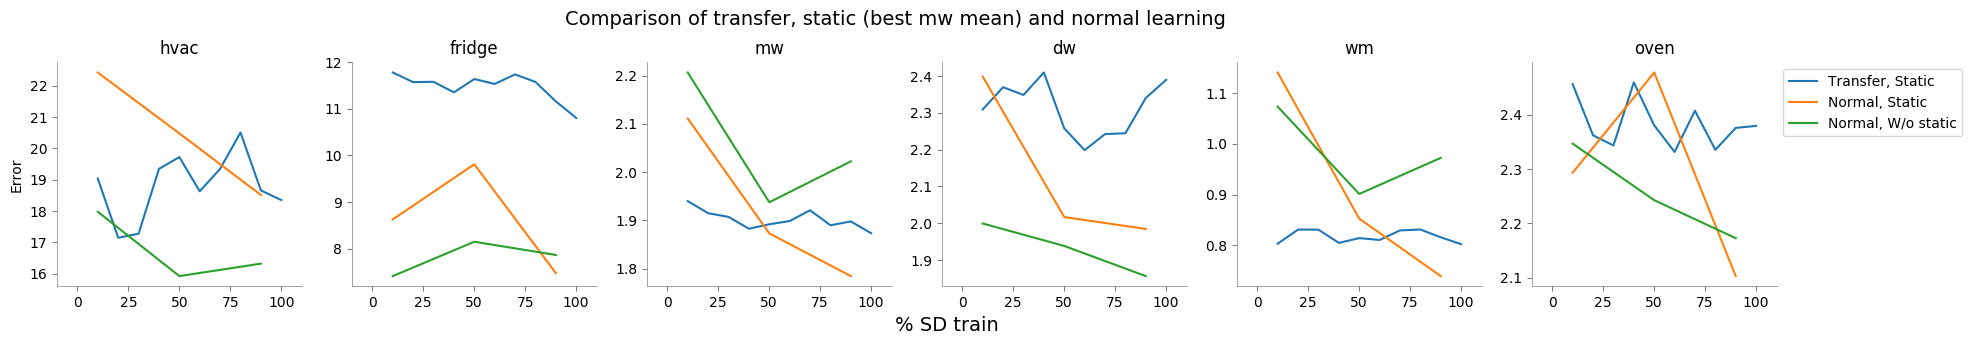

In [247]:
plt.style.use('default')
# Comparing best of 'Transfer+Static' with 'Normal+Static'
t = {}
for fraction in range(10, 110, 10):
    t[fraction] = pd.DataFrame(data['static'][1][7][8][fraction]).mean(axis=1)[APPLIANCES_ORDER[1:]]

normal_static_df = pd.Panel(normal_data['static'][0.01][2]).mean(axis=0)
normal_none_df = pd.Panel(normal_data[None][0.1][2]).mean(axis=0)


fig, ax = plt.subplots(ncols=6, figsize=(18, 3))
for col, appliance in enumerate(APPLIANCES_ORDER[1:]):
    pd.DataFrame(t).T[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Transfer, Static')
    normal_static_df[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Normal, Static')
    normal_none_df[appliance].plot(kind='line', title=appliance, ax=ax[col], label='Normal, W/o static')
    ax[col].set_xlim((-10, 110))
    format_axes(ax[col])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle("Comparison of transfer, static (best mw mean) and normal learning", fontsize=14, y=1.05)
fig.text(0.5,-0.02, "% SD train", fontsize=14)
ax[0].set_ylabel("Error")
fig.tight_layout()